In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve, auc

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

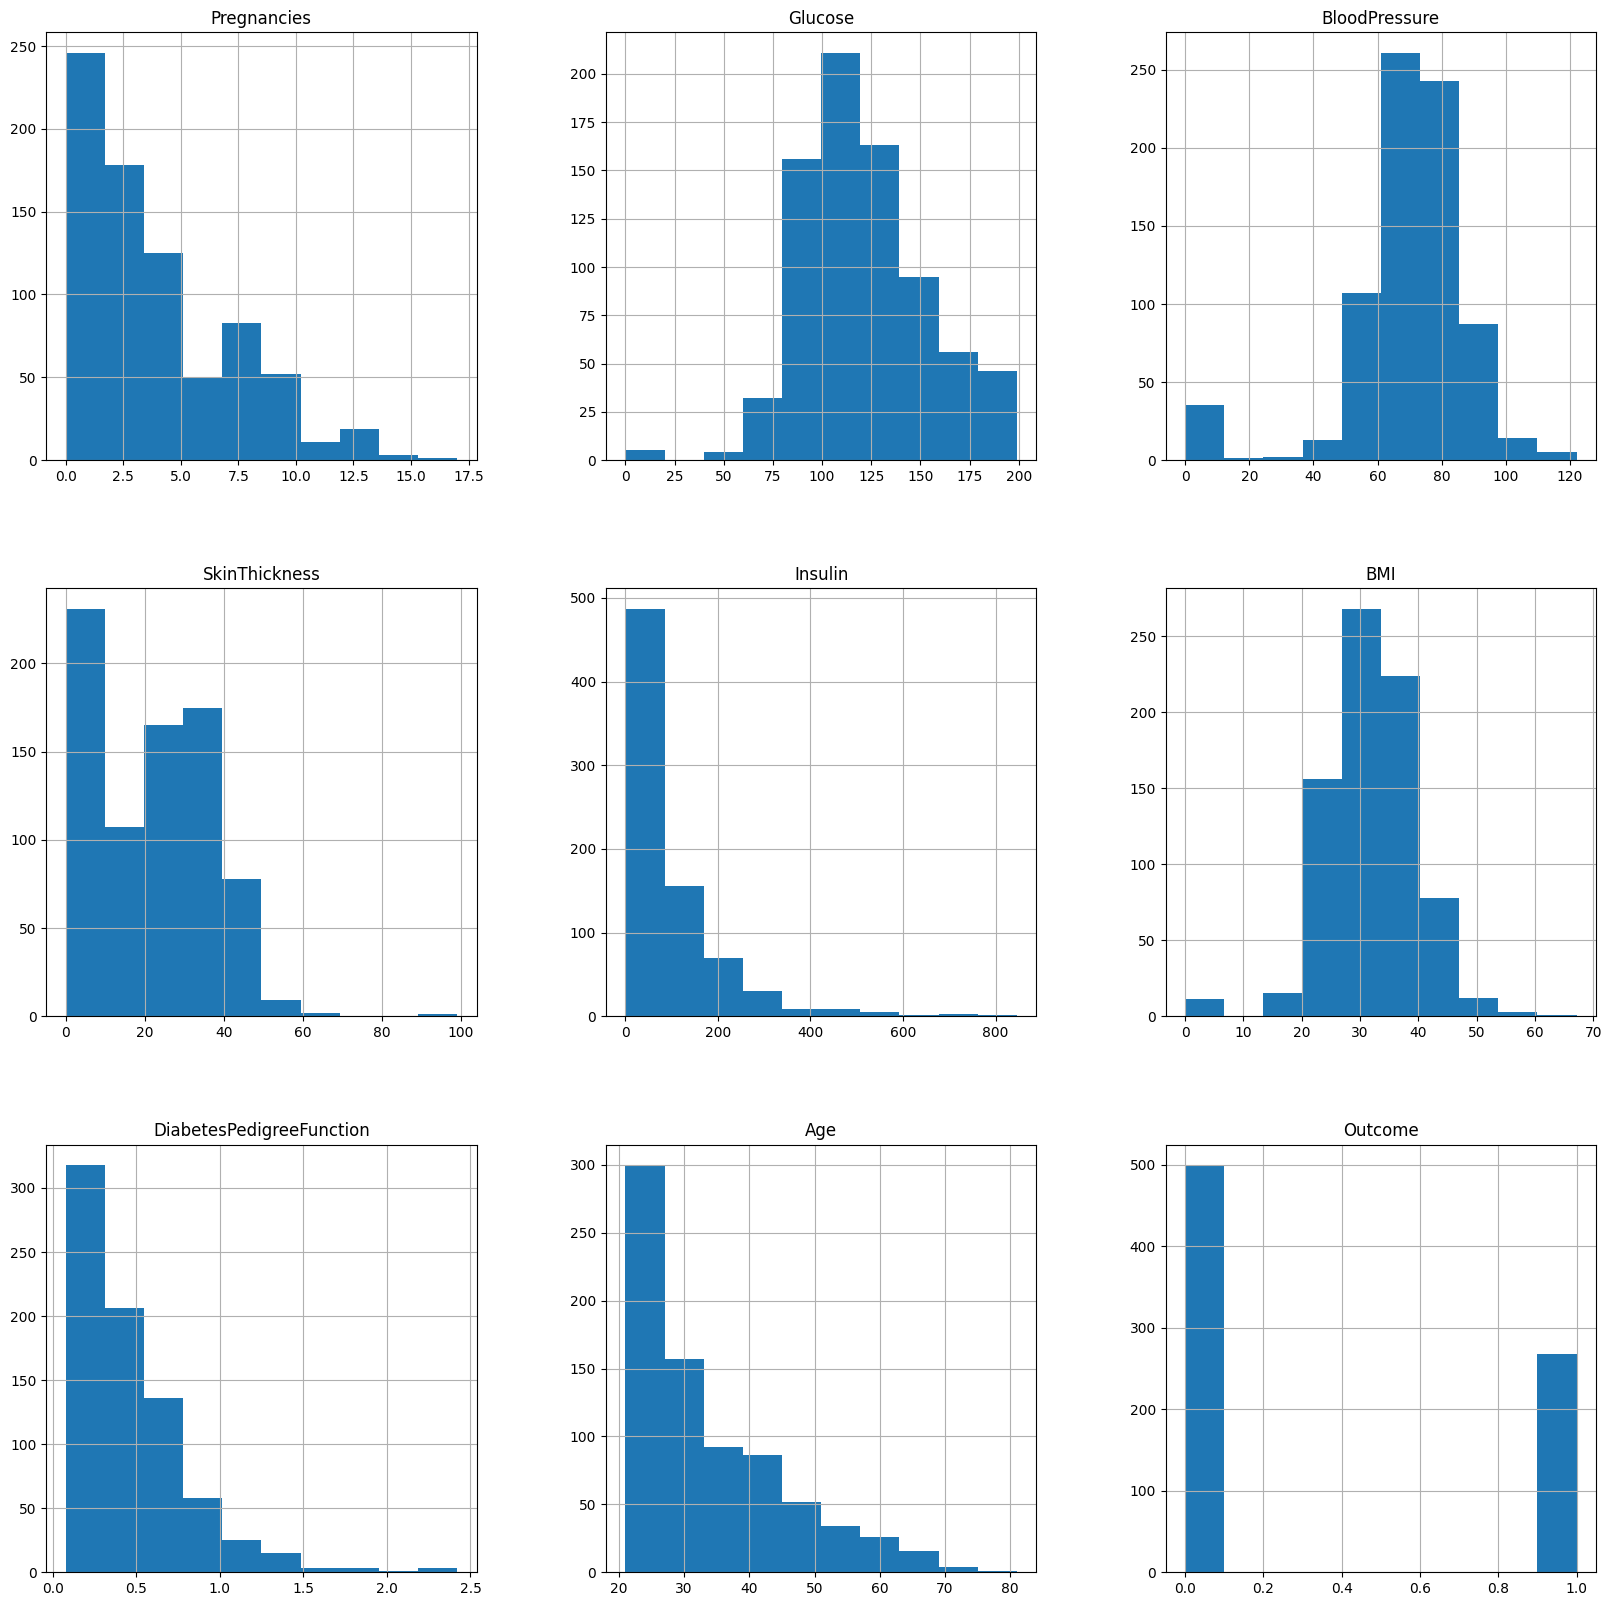

In [4]:
data = diabetes_data.hist(figsize= (20,20))

In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
diabetes_data.isnull().values.any() #check null value present

False

In [17]:
diabetes_data.isnull().sum()  # tell total no of null values in dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
diabetes_data.isnull().sum().sum() #check missing value present

0

In [21]:
(diabetes_data['Insulin'] == 0).sum().sum() #count no of zero values.

374

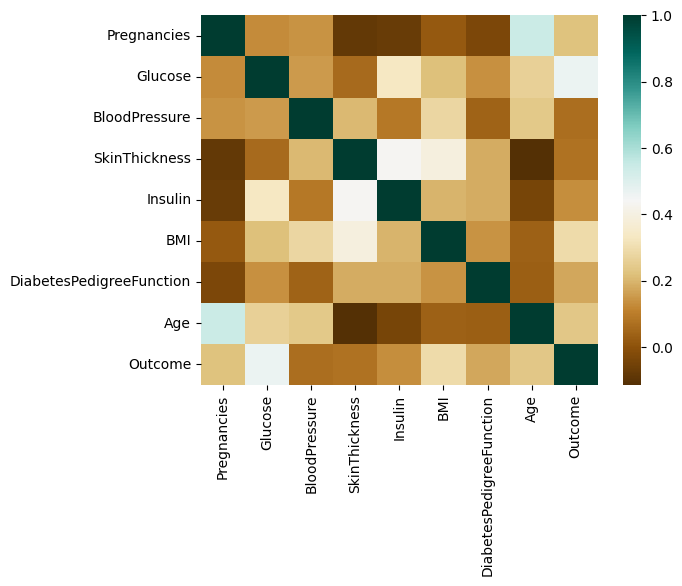

In [29]:
 g = sns.heatmap(diabetes_data.corr(),cmap="BrBG",annot=False)

Many kernel authors have neglected to deal with the null values and missing data discussed in this notebook. This mistake did not actually have much of an impact on the performance of most of their models, however, because, as it happens, the Insulin and SkinThickness measurements are actually very poor predictors and are assigned low feature importances as compared to features such as blood glucose levels and body mass index.

In [30]:
x = diabetes_data.drop(columns = 'Outcome', axis = 1)
y = diabetes_data['Outcome']

In [31]:
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [32]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)

In [33]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [34]:
x = standardized_data

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [39]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [43]:
y_pred_test = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_test)
print(accuracy)

0.7597402597402597


In [47]:
x_pred_train = model.predict(X_train)
accuracy = accuracy_score(y_pred_train, Y_train)
print(accuracy)

0.7850162866449512


In [51]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_test))

Confusion Matrix:
 [[89 11]
 [26 28]]


In [52]:
print("\nClassification Report:\n", classification_report(Y_test, y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154

